In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from typing import Dict, Tuple

In [2]:
df_train = pd.read_csv('data/train.csv')
df_train.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1104,Acer,Aspire ES1-523,Notebook,15.6,1366x768,AMD A8-Series 7410 2.2GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.4kg,387.0
1,114,Dell,XPS 13,Ultrabook,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i7 7560U 2.4GHz,8GB,256GB SSD,Intel Iris Plus Graphics 640,Windows 10,1.23kg,1379.0
2,172,Acer,Aspire A517-51G,Notebook,17.3,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Nvidia GeForce MX150,Windows 10,3kg,854.0
3,918,HP,Elitebook 820,Netbook,12.5,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.26kg,1483.0
4,447,Lenovo,IdeaPad 320-15AST,Notebook,17.3,1600x900,AMD A6-Series 9220 2.5GHz,8GB,1TB HDD,AMD Radeon R4,Windows 10,2.8kg,519.0


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         912 non-null    int64  
 1   Company           912 non-null    object 
 2   Product           912 non-null    object 
 3   TypeName          912 non-null    object 
 4   Inches            912 non-null    float64
 5   ScreenResolution  912 non-null    object 
 6   Cpu               912 non-null    object 
 7   Ram               912 non-null    object 
 8   Memory            912 non-null    object 
 9   Gpu               912 non-null    object 
 10  OpSys             912 non-null    object 
 11  Weight            912 non-null    object 
 12  Price_euros       912 non-null    float64
dtypes: float64(2), int64(1), object(10)
memory usage: 92.8+ KB


## Cleaning data

In [53]:
#Change 'Weight' to numeric by eliminating 'kg'
df_train['Weight'] = df_train['Weight'].replace('kg', '', regex=True)

In [59]:
#Split Memory information into different columns
df_train[['Memory1', 'Memory2']] = df_train['Memory'].str.split(' + ', n=1, expand=True)
df_train[['Memory1_1', 'Memory1_2']] = df_train['Memory1'].str.split(' ', n=1, expand=True)
df_train[['Memory2_1', 'Memory2_2']] = df_train['Memory2'].str.split(' ', n=1, expand=True)

#Replace NaN values with 0
df_train.loc[:, ['Memory1_1', 'Memory1_2', 'Memory2_1', 'Memory2_2']] = df_train.loc[:, ['Memory1_1', 'Memory1_2', 'Memory2_1', 'Memory2_2']].fillna(0)

#Eliminate spaces, '+' from Memory columns
df_train.loc[:, ['Memory1_1', 'Memory1_2', 'Memory2_1', 'Memory2_2']] = df_train.loc[:, ['Memory1_1', 'Memory1_2', 'Memory2_1', 'Memory2_2']].replace(' ', '', regex=True)
df_train.loc[:, ['Memory1_1', 'Memory1_2', 'Memory2_1', 'Memory2_2']] = df_train.loc[:, ['Memory1_1', 'Memory1_2', 'Memory2_1', 'Memory2_2']].replace(r'\+', '', regex=True)

#Eliminate GB and transform TB to GB in Memory columns
df_train.loc[:, ['Memory1_1', 'Memory2_1']] = df_train.loc[:, ['Memory1_1', 'Memory2_1']].replace('GB', '', regex=True)
df_train.loc[:, ['Memory1_1', 'Memory2_1']] = df_train.loc[:, ['Memory1_1', 'Memory2_1']].replace('1.0TB', '1000', regex=True)
df_train.loc[:, ['Memory1_1', 'Memory2_1']] = df_train.loc[:, ['Memory1_1', 'Memory2_1']].replace('TB', '000', regex=True)

#Drop old columns
df_train1 = df_train.drop(['Memory', 'Memory1', 'Memory2'], axis=1)
df_train1['Memory1_1'].unique()

array(['500', '256', '512', '1000', '128', '32', '64', '180', '2000',
       '16', '508'], dtype=object)

In [60]:
#Remove GB in Ram column
df_train1['Ram'] = df_train1['Ram'].replace('GB', '', regex=True)
df_train1['Ram'].unique()

array(['4', '8', '16', '6', '32', '12', '2', '24'], dtype=object)

In [61]:
#Change Resolution column to numeric values
import re
df_train1['Resolution1'] = df_train1['ScreenResolution'].apply(lambda x: [int(n) for n in re.findall(r'\d+', x)])
df_train1['Resolution1'] = df_train1['Resolution1'].apply(lambda x: [int(x[0]) * int(x[1])][0])

df_train1['Resolution1'].unique()

array([1049088, 5760000, 2073600, 1440000, 3317760,   15360, 3686400,
       1296000, 3393024, 5184000, 4096000, 3840000, 2304000, 3110400],
      dtype=int64)

In [62]:
df_train1.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Memory1_1,Memory1_2,Memory2_1,Memory2_2,Resolution1
0,1104,Acer,Aspire ES1-523,Notebook,15.6,1366x768,AMD A8-Series 7410 2.2GHz,4,AMD Radeon R5,Windows 10,2.4,387.0,500,HDD,0,0,1049088
1,114,Dell,XPS 13,Ultrabook,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i7 7560U 2.4GHz,8,Intel Iris Plus Graphics 640,Windows 10,1.23,1379.0,256,SSD,0,0,5760000
2,172,Acer,Aspire A517-51G,Notebook,17.3,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,Nvidia GeForce MX150,Windows 10,3,854.0,256,SSD,0,0,2073600
3,918,HP,Elitebook 820,Netbook,12.5,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,Intel HD Graphics 620,Windows 10,1.26,1483.0,512,SSD,0,0,2073600
4,447,Lenovo,IdeaPad 320-15AST,Notebook,17.3,1600x900,AMD A6-Series 9220 2.5GHz,8,AMD Radeon R4,Windows 10,2.8,519.0,1000,HDD,0,0,1440000


In [70]:
import re
#Split Gpu and Cpu information into different columns
df_train1['Gpu'] = df_train1['Gpu'].str.split().str[:2].str.join(' ')
df_train1[['Gpu1', 'Gpu2']] = df_train1['Gpu'].str.split(' ', n=1, expand=True)

#df_train1['Cpu'] = df_train1['Cpu'].str.split().str[:3].str.join(' ')
#pattern = r'\d+\.\d+GHz|\d+GHz'
df_train1['Cpu_speed'] = df_train1['Cpu'].str.extract(r'\d+(\.\d+)?GHz')
#df_train1[['Cpu1', 'Cpu2', 'Cpu3', 'Cpu4']] = df_train1['Cpu'].str.split(' ', n=3, expand=True)

df_train1['Cpu'].unique()

ValueError: pattern contains no capture groups

### Functions

In [93]:
def assign_numeric_values(df: DataFrame, column: str, dic: Dict[str, int]) -> Tuple[DataFrame, Dict[str, int]]:
    '''
    Assigns numerical values to a column in a Pandas DataFrame based on a dictionary of values.

    Args:
    df (DataFrame): The DataFrame containing the column to be transformed.
    column (str): The name of the column to be transformed.
    dic (Dict[str, int]): A dictionary of unique values in the column and their corresponding numeric values.

    Returns:
    A tuple containing the transformed DataFrame and the updated dictionary of unique values and their corresponding numeric values.
    '''

    le = LabelEncoder()

    # Add unique values to dictionary
    unique_values = df[column].unique()
    new_values = [value for value in unique_values if value not in dic]
    for i, value in enumerate(new_values):
        dic[value] = le.fit_transform([value])[0] + len(dic)

    # Assign numerical values to column in DataFrame
    df[column] = df[column].apply(lambda x: dic.get(x, x))

    return df, dic


#### Dictionaries

In [ ]:
Company_dic = dict()
OpSys_dic = dict()
TypeName_dic = dict()
Memory_dic = dict()
Memory_dic = dict()



In [90]:
assign_numeric_values(df_train, 'TypeName')


,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Memory1,Memory2,Memory1_1,Memory1_2,Memory2_1,Memory2_2
0,1104,Acer,Aspire ES1-523,0,15.6,1366x768,AMD A8-Series 7410 2.2GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.4,387.00,500GB HDD,None,500GB,1,0,0
1,114,Dell,XPS 13,1,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i7 7560U 2.4GHz,8GB,256GB SSD,Intel Iris Plus Graphics 640,Windows 10,1.23,1379.00,256GB SSD,None,256GB,2,0,0
2,172,Acer,Aspire A517-51G,0,17.3,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Nvidia GeForce MX150,Windows 10,3,854.00,256GB SSD,None,256GB,2,0,0
3,918,HP,Elitebook 820,2,12.5,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.26,1483.00,512GB SSD,None,512GB,2,0,0
4,447,Lenovo,IdeaPad 320-15AST,0,17.3,1600x900,AMD A6-Series 9220 2.5GHz,8GB,1TB HDD,AMD Radeon R4,Windows 10,2.8,519.00,1TB HDD,None,1TB,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,996,Lenovo,IdeaPad 320-15ABR,0,15.6,Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,6GB,256GB SSD,AMD Radeon 530,Windows 10,2.2,549.00,256GB SSD,None,256GB,2,0,0
908,731,Dell,Alienware 17,3,17.3,4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,32GB,1TB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.36,3659.40,1TB SSD +,1TB HDD,1TB,2,1TB,1
909,276,Asus,Rog Strix,3,17.3,Full HD 1920x1080,AMD Ryzen 1700 3GHz,16GB,256GB SSD + 1TB HDD,AMD Radeon RX 580,Windows 10,3.2,1549.00,256GB SSD +,1TB HDD,256GB,2,1TB,1
910,585,MSI,GT73VR Titan,3,17.3,Full HD 1920x1080,Intel Core i7 7820HK 2.9GHz,16GB,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.14,2729.00,512GB SSD +,1TB HDD,512GB,2,1TB,1


In [5]:



df_train.loc[:, ['Memory1_2', 'Memory2_2']] = df_train.loc[:, ['Memory1_2', 'Memory2_2']].replace('HDD', 1)
df_train.loc[:, ['Memory1_2', 'Memory2_2']] = df_train.loc[:, ['Memory1_2', 'Memory2_2']].replace('HDD +', 1)
df_train.loc[:, ['Memory1_2', 'Memory2_2']] = df_train.loc[:, ['Memory1_2', 'Memory2_2']].replace('SSD', 2)
df_train.loc[:, ['Memory1_2', 'Memory2_2']] = df_train.loc[:, ['Memory1_2', 'Memory2_2']].replace('SSD +', 2)
df_train.loc[:, ['Memory1_2', 'Memory2_2']] = df_train.loc[:, ['Memory1_2', 'Memory2_2']].replace('Hybrid', 3)
df_train.loc[:, ['Memory1_2', 'Memory2_2']] = df_train.loc[:, ['Memory1_2', 'Memory2_2']].replace('Hybrid +', 3)
df_train.loc[:, ['Memory1_2', 'Memory2_2']] = df_train.loc[:, ['Memory1_2', 'Memory2_2']].replace('Flash Storage', 4)
df_train.loc[:, ['Memory1_2', 'Memory2_2']] = df_train.loc[:, ['Memory1_2', 'Memory2_2']].replace('Flash Storage +', 4)


df_train['Memory1_1'] = df_train['Memory1_1'].replace('GB', '', regex=True)
df_train['Memory1_1'] = df_train['Memory1_1'].replace('1.0TB', '1000', regex=True)
df_train['Memory1_1'] = df_train['Memory1_1'].replace('TB', '000', regex=True)

df_train['Memory2_1'] = df_train['Memory2_1'].fillna(0)
df_train['Memory2_1'] = df_train['Memory2_1'].replace('GB', '', regex=True)
df_train['Memory2_1'] = df_train['Memory2_1'].replace('TB', '000', regex=True)

df_train1 = df_train.drop(['Memory', 'Memory1', 'Memory2'], axis=1)
df_train1.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Memory1_1,Memory1_2,Memory2_1,Memory2_2
0,1104,Acer,Aspire ES1-523,Notebook,15.6,1366x768,AMD A8-Series 7410 2.2GHz,4GB,AMD Radeon R5,Windows 10,2.4,387.0,500,1,0,0
1,114,Dell,XPS 13,Ultrabook,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i7 7560U 2.4GHz,8GB,Intel Iris Plus Graphics 640,Windows 10,1.23,1379.0,256,2,0,0
2,172,Acer,Aspire A517-51G,Notebook,17.3,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,Nvidia GeForce MX150,Windows 10,3,854.0,256,2,0,0
3,918,HP,Elitebook 820,Netbook,12.5,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,Intel HD Graphics 620,Windows 10,1.26,1483.0,512,2,0,0
4,447,Lenovo,IdeaPad 320-15AST,Notebook,17.3,1600x900,AMD A6-Series 9220 2.5GHz,8GB,AMD Radeon R4,Windows 10,2.8,519.0,1000,1,0,0


In [7]:
df_train1['Ram'] = df_train1['Ram'].replace('GB', '', regex=True)

In [8]:
df_train1['ScreenResolution'] = df_train1['ScreenResolution'].replace('1366x768', '1049', regex=True)
df_train1['ScreenResolution'] = df_train1['ScreenResolution'].replace('1440x900', '1296', regex=True)
df_train1['ScreenResolution'] = df_train1['ScreenResolution'].replace('1600x900', '8294', regex=True)
df_train1['ScreenResolution'] = df_train1['ScreenResolution'].replace('1920x1080', '2073', regex=True)
df_train1['ScreenResolution'] = df_train1['ScreenResolution'].replace('1920x1200', '2304', regex=True)
df_train1['ScreenResolution'] = df_train1['ScreenResolution'].replace('2160x1440', '3110', regex=True)
df_train1['ScreenResolution'] = df_train1['ScreenResolution'].replace('2304x1440', '3318', regex=True)
df_train1['ScreenResolution'] = df_train1['ScreenResolution'].replace('2256x1504', '3393', regex=True)
df_train1['ScreenResolution'] = df_train1['ScreenResolution'].replace('2560x1440', '3686', regex=True)
df_train1['ScreenResolution'] = df_train1['ScreenResolution'].replace('2560x1600', '4096', regex=True)
df_train1['ScreenResolution'] = df_train1['ScreenResolution'].replace('2880x1800', '5184', regex=True)
df_train1['ScreenResolution'] = df_train1['ScreenResolution'].replace('2400x1600', '3840', regex=True)
df_train1['ScreenResolution'] = df_train1['ScreenResolution'].replace('3200x1800', '5760', regex=True)
df_train1['ScreenResolution'] = df_train1['ScreenResolution'].replace('3840x2160', '8294', regex=True)

df_train1['ScreenResolution'].unique()

array(['1049', 'Quad HD+ / Touchscreen 5760', 'IPS Panel Full HD 2073',
       'Full HD 2073', '8294', 'IPS Panel Full HD / Touchscreen 2073',
       'IPS Panel Retina Display 3318', '4K Ultra HD / Touchscreen 8294',
       'Touchscreen 3686', 'Full HD / Touchscreen 2073', '1296',
       'IPS Panel Quad HD+ / Touchscreen 5760', 'Touchscreen 3393',
       'IPS Panel 4K Ultra HD / Touchscreen 8294',
       'IPS Panel Touchscreen / 4K Ultra HD 8294', 'IPS Panel 1049',
       '4K Ultra HD 8294', 'IPS Panel 4K Ultra HD 8294',
       'IPS Panel Retina Display 5184', 'IPS Panel Touchscreen 3686',
       'Touchscreen 1049', '3686', 'IPS Panel Retina Display 4096',
       'Quad HD+ 5760', 'IPS Panel Full HD 3686', '2073',
       'Touchscreen 3840', 'IPS Panel 3686', 'IPS Panel Quad HD+ 5760',
       'IPS Panel Touchscreen 1049', 'IPS Panel Touchscreen 2304',
       'Touchscreen / Quad HD+ 5760', 'IPS Panel Quad HD+ 3686',
       'IPS Panel Full HD 3110'], dtype=object)

In [9]:
df_train1['Resolution'] = df_train1['ScreenResolution'].str[-4:]

df_train1.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Memory1_1,Memory1_2,Memory2_1,Memory2_2,Resolution
0,1104,Acer,Aspire ES1-523,Notebook,15.6,1049,AMD A8-Series 7410 2.2GHz,4,AMD Radeon R5,Windows 10,2.4,387.0,500,1,0,0,1049
1,114,Dell,XPS 13,Ultrabook,13.3,Quad HD+ / Touchscreen 5760,Intel Core i7 7560U 2.4GHz,8,Intel Iris Plus Graphics 640,Windows 10,1.23,1379.0,256,2,0,0,5760
2,172,Acer,Aspire A517-51G,Notebook,17.3,IPS Panel Full HD 2073,Intel Core i5 8250U 1.6GHz,8,Nvidia GeForce MX150,Windows 10,3,854.0,256,2,0,0,2073
3,918,HP,Elitebook 820,Netbook,12.5,Full HD 2073,Intel Core i7 7500U 2.7GHz,8,Intel HD Graphics 620,Windows 10,1.26,1483.0,512,2,0,0,2073
4,447,Lenovo,IdeaPad 320-15AST,Notebook,17.3,8294,AMD A6-Series 9220 2.5GHz,8,AMD Radeon R4,Windows 10,2.8,519.0,1000,1,0,0,8294


In [10]:
#Numeric categorization of TypeName
df_train1['OpSys'] = df_train1['OpSys'].replace(to_replace='No OS', value=0, regex=True)
df_train1['OpSys'] = df_train1['OpSys'].replace(to_replace='Linux', value=1, regex=True)
df_train1['OpSys'] = df_train1['OpSys'].replace(to_replace='Android', value=2, regex=True)
df_train1['OpSys'] = df_train1['OpSys'].replace(to_replace='Chrome OS', value=3, regex=True)
df_train1['OpSys'] = df_train1['OpSys'].replace(to_replace='Windows 7', value=4, regex=True)
df_train1['OpSys'] = df_train1['OpSys'].replace(to_replace='Windows 10 S', value=5, regex=True)
df_train1['OpSys'] = df_train1['OpSys'].replace(to_replace='Windows 10', value=6, regex=True)
df_train1['OpSys'] = df_train1['OpSys'].replace(to_replace='macOS', value=7, regex=True)
df_train1['OpSys'] = df_train1['OpSys'].replace(to_replace='Mac OS X', value=8, regex=True)
df_train1["OpSys"].unique()

array([6, 0, 1, 8, 4, 3, 7, 5, 2], dtype=int64)

In [11]:
#Numeric categorization of TypeName
df_train1['TypeName'] = df_train1['TypeName'].replace(to_replace='Workstation', value=6, regex=True)
df_train1['TypeName'] = df_train1['TypeName'].replace(to_replace='Notebook', value=5, regex=True)
df_train1['TypeName'] = df_train1['TypeName'].replace(to_replace='Ultrabook', value=4, regex=True)
df_train1['TypeName'] = df_train1['TypeName'].replace(to_replace='Netbook', value=3, regex=True)
df_train1['TypeName'] = df_train1['TypeName'].replace(to_replace='Gaming', value=2, regex=True)
df_train1['TypeName'] = df_train1['TypeName'].replace(to_replace='2 in 1 Convertible', value=1, regex=True)
df_train1['TypeName'].unique()

array([5, 4, 3, 2, 1, 6], dtype=int64)

In [12]:
#Numeric categorization of Company
df_train1['Company'] = df_train1['Company'].replace(to_replace='Acer', value=1, regex=True)
df_train1['Company'] = df_train1['Company'].replace(to_replace='Dell', value=2, regex=True)
df_train1['Company'] = df_train1['Company'].replace(to_replace='HP', value=3, regex=True)
df_train1['Company'] = df_train1['Company'].replace(to_replace='Lenovo', value=4, regex=True)
df_train1['Company'] = df_train1['Company'].replace(to_replace='Asus', value=5, regex=True)
df_train1['Company'] = df_train1['Company'].replace(to_replace='Xiaomi', value=6, regex=True)
df_train1['Company'] = df_train1['Company'].replace(to_replace='Apple', value=7, regex=True)
df_train1['Company'] = df_train1['Company'].replace(to_replace='Samsung', value=8, regex=True)
df_train1['Company'] = df_train1['Company'].replace(to_replace='Razer', value=9, regex=True)
df_train1['Company'] = df_train1['Company'].replace(to_replace='Toshiba', value=10, regex=True)
df_train1['Company'] = df_train1['Company'].replace(to_replace='Fujitsu', value=11, regex=True)
df_train1['Company'] = df_train1['Company'].replace(to_replace='Microsoft', value=12, regex=True)
df_train1['Company'] = df_train1['Company'].replace(to_replace='MSI', value=13, regex=True)
df_train1['Company'] = df_train1['Company'].replace(to_replace='LG', value=14, regex=True)
df_train1['Company'] = df_train1['Company'].replace(to_replace='Mediacom', value=15, regex=True)
df_train1['Company'] = df_train1['Company'].replace(to_replace='Google', value=16, regex=True)
df_train1['Company'] = df_train1['Company'].replace(to_replace='Vero', value=17, regex=True)
df_train1['Company'] = df_train1['Company'].replace(to_replace='Huawei', value=18, regex=True)
df_train1['Company'] = df_train1['Company'].replace(to_replace='Chuwi', value=19, regex=True)


df_train1['Company'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19], dtype=int64)

In [13]:

df_train1['Gpu1'] = df_train1['Gpu1'].replace('AMD', '1')
df_train1['Gpu1'] = df_train1['Gpu1'].replace('Intel', '2')
df_train1['Gpu1'] = df_train1['Gpu1'].replace('Nvidia', '3')

df_train1['Gpu2'] = df_train1['Gpu2'].replace('Radeon', '1')
df_train1['Gpu2'] = df_train1['Gpu2'].replace('Iris', '2')
df_train1['Gpu2'] = df_train1['Gpu2'].replace('HD', '3')
df_train1['Gpu2'] = df_train1['Gpu2'].replace('UHD', '4')
df_train1['Gpu2'] = df_train1['Gpu2'].replace('GTX', '5')
df_train1['Gpu2'] = df_train1['Gpu2'].replace('GeForce', '6')
df_train1['Gpu2'] = df_train1['Gpu2'].replace('Graphics', '7')
df_train1['Gpu2'] = df_train1['Gpu2'].replace('R17M-M1-70', '8')
df_train1['Gpu2'] = df_train1['Gpu2'].replace('Quadro', '9')
df_train1['Gpu2'] = df_train1['Gpu2'].replace('FirePro', '10')
df_train1['Gpu2'] = df_train1['Gpu2'].replace('R4', '11')


df_train1['Gpu2'].unique()

array(['1', '2', '6', '3', '4', '9', '5', '10', '8', '11', '7'],
      dtype=object)

In [14]:

df_train1['Cpu1'] = df_train1['Cpu1'].replace('AMD', '1')
df_train1['Cpu1'] = df_train1['Cpu1'].replace('Intel', '2')

df_train1['Cpu2'] = df_train1['Cpu2'].replace('A6-Series', '1')
df_train1['Cpu2'] = df_train1['Cpu2'].replace('A8-Series', '2')
df_train1['Cpu2'] = df_train1['Cpu2'].replace('A9-Series', '3')
df_train1['Cpu2'] = df_train1['Cpu2'].replace('A10-Series', '4')
df_train1['Cpu2'] = df_train1['Cpu2'].replace('A12-Series', '5')
df_train1['Cpu2'] = df_train1['Cpu2'].replace('Xeon', '6')
df_train1['Cpu2'] = df_train1['Cpu2'].replace('Pentium', '7')
df_train1['Cpu2'] = df_train1['Cpu2'].replace('Celeron', '8')
df_train1['Cpu2'] = df_train1['Cpu2'].replace('Core', '9')
df_train1['Cpu2'] = df_train1['Cpu2'].replace('E-Series', '10')
df_train1['Cpu2'] = df_train1['Cpu2'].replace('Atom', '11')
df_train1['Cpu2'] = df_train1['Cpu2'].replace('FX', '12')
df_train1['Cpu2'] = df_train1['Cpu2'].replace('Ryzen', '13')

df_train1['Cpu3'] = df_train1['Cpu3'].replace('M', '1')
df_train1['Cpu3'] = df_train1['Cpu3'].replace('Dual', '2')
df_train1['Cpu3'] = df_train1['Cpu3'].replace('Quad', '3')
df_train1['Cpu3'] = df_train1['Cpu3'].replace('i3', '4')
df_train1['Cpu3'] = df_train1['Cpu3'].replace('i5', '5')
df_train1['Cpu3'] = df_train1['Cpu3'].replace('i7', '6')
df_train1['Cpu3'] = df_train1['Cpu3'].replace('A6-9220', '7')
df_train1['Cpu3'] = df_train1['Cpu3'].replace('E2-9000e', '8')
df_train1['Cpu3'] = df_train1['Cpu3'].replace('E2-9000', '9')
df_train1['Cpu3'] = df_train1['Cpu3'].replace('E3-1505M', '10')
df_train1['Cpu3'] = df_train1['Cpu3'].replace('E3-1535M', '11')
df_train1['Cpu3'] = df_train1['Cpu3'].replace('x5-Z8300', '12')
df_train1['Cpu3'] = df_train1['Cpu3'].replace('x5-Z8350', '13')
df_train1['Cpu3'] = df_train1['Cpu3'].replace('x5-Z8550', '14')
df_train1['Cpu3'] = df_train1['Cpu3'].replace('A9-9420', '15')
df_train1['Cpu3'] = df_train1['Cpu3'].replace('1600', '16')
df_train1['Cpu3'] = df_train1['Cpu3'].replace('1700', '17')
df_train1['Cpu3'] = df_train1['Cpu3'].replace('6110', '18')
df_train1['Cpu3'] = df_train1['Cpu3'].replace('7110', '19')
df_train1['Cpu3'] = df_train1['Cpu3'].replace('7310', '20')
df_train1['Cpu3'] = df_train1['Cpu3'].replace('7410', '21')
df_train1['Cpu3'] = df_train1['Cpu3'].replace('9000', '22')
df_train1['Cpu3'] = df_train1['Cpu3'].replace('9220', '23')
df_train1['Cpu3'] = df_train1['Cpu3'].replace('9410', '24')
df_train1['Cpu3'] = df_train1['Cpu3'].replace('9420', '25')
df_train1['Cpu3'] = df_train1['Cpu3'].replace('8800P', '26')
df_train1['Cpu3'] = df_train1['Cpu3'].replace('9600P', '27')
df_train1['Cpu3'] = df_train1['Cpu3'].replace('9620P', '28')
df_train1['Cpu3'] = df_train1['Cpu3'].replace('9720P', '29')



df_train1['Cpu3'].unique()

array(['21', '6', '5', '23', '4', '3', '2', '1', '18', '25', '10', '29',
       '19', '28', '24', '13', '9', '20', '26', '11', '16', '7', '14',
       '22', '8', '27', '15', '12', '17'], dtype=object)

In [15]:
df_train1.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,...,Memory1_1,Memory1_2,Memory2_1,Memory2_2,Resolution,Gpu1,Gpu2,Cpu1,Cpu2,Cpu3
0,1104,1,Aspire ES1-523,5,15.6,1049,AMD A8-Series 7410,4,AMD Radeon,6,...,500,1,0,0,1049,1,1,1,2,21
1,114,2,XPS 13,4,13.3,Quad HD+ / Touchscreen 5760,Intel Core i7,8,Intel Iris,6,...,256,2,0,0,5760,2,2,2,9,6
2,172,1,Aspire A517-51G,5,17.3,IPS Panel Full HD 2073,Intel Core i5,8,Nvidia GeForce,6,...,256,2,0,0,2073,3,6,2,9,5
3,918,3,Elitebook 820,3,12.5,Full HD 2073,Intel Core i7,8,Intel HD,6,...,512,2,0,0,2073,2,3,2,9,6
4,447,4,IdeaPad 320-15AST,5,17.3,8294,AMD A6-Series 9220,8,AMD Radeon,6,...,1000,1,0,0,8294,1,1,1,1,23


In [16]:
df_train2 = df_train1.drop(['ScreenResolution', 'Product', 'Cpu', 'Gpu'], axis=1)
df_train2.head()

,laptop_ID,Company,TypeName,Inches,Ram,OpSys,Weight,Price_euros,Memory1_1,Memory1_2,Memory2_1,Memory2_2,Resolution,Gpu1,Gpu2,Cpu1,Cpu2,Cpu3
0,1104,1,5,15.6,4,6,2.4,387.0,500,1,0,0,1049,1,1,1,2,21
1,114,2,4,13.3,8,6,1.23,1379.0,256,2,0,0,5760,2,2,2,9,6
2,172,1,5,17.3,8,6,3,854.0,256,2,0,0,2073,3,6,2,9,5
3,918,3,3,12.5,8,6,1.26,1483.0,512,2,0,0,2073,2,3,2,9,6
4,447,4,5,17.3,8,6,2.8,519.0,1000,1,0,0,8294,1,1,1,1,23


In [17]:
df_train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   laptop_ID    912 non-null    int64  
 1   Company      912 non-null    int64  
 2   TypeName     912 non-null    int64  
 3   Inches       912 non-null    float64
 4   Ram          912 non-null    object 
 5   OpSys        912 non-null    int64  
 6   Weight       912 non-null    object 
 7   Price_euros  912 non-null    float64
 8   Memory1_1    912 non-null    object 
 9   Memory1_2    912 non-null    object 
 10  Memory2_1    912 non-null    object 
 11  Memory2_2    912 non-null    object 
 12  Resolution   912 non-null    object 
 13  Gpu1         912 non-null    object 
 14  Gpu2         912 non-null    object 
 15  Cpu1         912 non-null    object 
 16  Cpu2         912 non-null    object 
 17  Cpu3         912 non-null    object 
dtypes: float64(2), int64(4), object(12)
memory usage: 

In [18]:
# Change data type of new columns to numeric
df_train2['Ram'] = df_train2['Ram'].astype(int)
df_train2['Weight'] = df_train2['Weight'].astype(float)
df_train2['Memory1_1'] = df_train2['Memory1_1'].astype(int)
df_train2['Memory1_2'] = df_train2['Memory1_2'].astype(int)
df_train2['Memory2_1'] = df_train2['Memory2_1'].astype(int)
df_train2['Memory2_2'] = df_train2['Memory2_2'].astype(int)
df_train2['Resolution'] = df_train2['Resolution'].astype(int)
df_train2['Gpu1'] = df_train2['Gpu1'].astype(int)
df_train2['Gpu2'] = df_train2['Gpu2'].astype(int)
df_train2['Cpu1'] = df_train2['Cpu1'].astype(int)
df_train2['Cpu2'] = df_train2['Cpu2'].astype(int)
df_train2['Cpu3'] = df_train2['Cpu2'].astype(int)

df_train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   laptop_ID    912 non-null    int64  
 1   Company      912 non-null    int64  
 2   TypeName     912 non-null    int64  
 3   Inches       912 non-null    float64
 4   Ram          912 non-null    int32  
 5   OpSys        912 non-null    int64  
 6   Weight       912 non-null    float64
 7   Price_euros  912 non-null    float64
 8   Memory1_1    912 non-null    int32  
 9   Memory1_2    912 non-null    int32  
 10  Memory2_1    912 non-null    int32  
 11  Memory2_2    912 non-null    int32  
 12  Resolution   912 non-null    int32  
 13  Gpu1         912 non-null    int32  
 14  Gpu2         912 non-null    int32  
 15  Cpu1         912 non-null    int32  
 16  Cpu2         912 non-null    int32  
 17  Cpu3         912 non-null    int32  
dtypes: float64(3), int32(11), int64(4)
memory usage: 8

In [19]:
train2 = df_train2

In [20]:
train2.to_csv('data/train2.csv', index=False)

In [23]:
from sklearn.model_selection import train_test_split
laptops_data_train, laptops_data_test, laptops_target_train, laptops_target_test = train_test_split(train2['laptop_ID'], train2['Price_euros'], test_size=0.2, shuffle=False)


# Univariate analysis

In [24]:
train2.describe()

,laptop_ID,Company,TypeName,Inches,Ram,OpSys,Weight,Price_euros,Memory1_1,Memory1_2,Memory2_1,Memory2_2,Resolution,Gpu1,Gpu2,Cpu1,Cpu2,Cpu3
count,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000
mean,669.402412,4.098684,4.020833,14.982785,8.269737,5.355263,2.021819,1116.964013,437.850877,1.838816,161.491228,0.156798,2292.059211,2.160088,3.785088,1.955044,8.664474,8.664474
std,379.372130,3.031325,1.442877,1.417299,4.822382,1.712258,0.653525,681.619330,346.731927,0.705402,400.568098,0.375685,1635.886964,0.639555,1.898025,0.207322,1.299045,1.299045
min,1.000000,1.000000,1.000000,10.100000,2.000000,0.000000,0.690000,191.900000,16.000000,1.000000,0.000000,0.000000,1049.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,345.750000,2.000000,3.000000,14.000000,4.000000,6.000000,1.500000,598.000000,256.000000,1.000000,0.000000,0.000000,1296.000000,2.000000,3.000000,2.000000,9.000000,9.000000
50%,676.500000,3.000000,5.000000,15.600000,8.000000,6.000000,2.040000,979.000000,256.000000,2.000000,0.000000,0.000000,2073.000000,2.000000,3.000000,2.000000,9.000000,9.000000
75%,993.000000,4.000000,5.000000,15.600000,8.000000,6.000000,2.300000,1476.332500,512.000000,2.000000,0.000000,0.000000,2073.000000,3.000000,6.000000,2.000000,9.000000,9.000000
max,1318.000000,19.000000,6.000000,18.400000,32.000000,8.000000,4.600000,5499.000000,2000.000000,4.000000,2000.000000,2.000000,8294.000000,3.000000,11.000000,2.000000,13.000000,13.000000


C:\Users\crist\AppData\Local\Temp\ipykernel_18804\2449792958.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train2['Price_euros']);


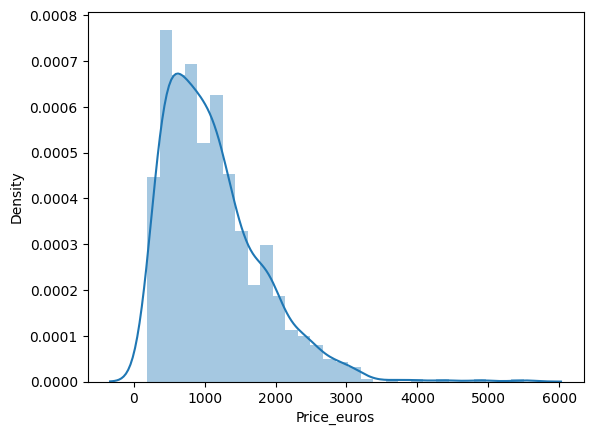

In [25]:
sns.distplot(train2['Price_euros']);

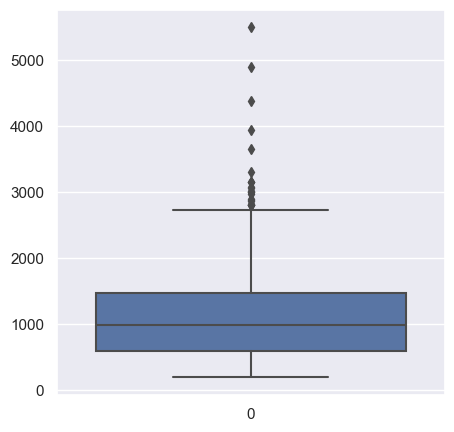

In [26]:
sns.set(rc={'figure.figsize':(5, 5)})
sns.boxplot(train2['Price_euros']);

C:\Users\crist\AppData\Local\Temp\ipykernel_18804\473048537.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train2['Company'], color="olive", ax=axes[0, 0])
C:\Users\crist\AppData\Local\Temp\ipykernel_18804\473048537.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train2['TypeName'], col

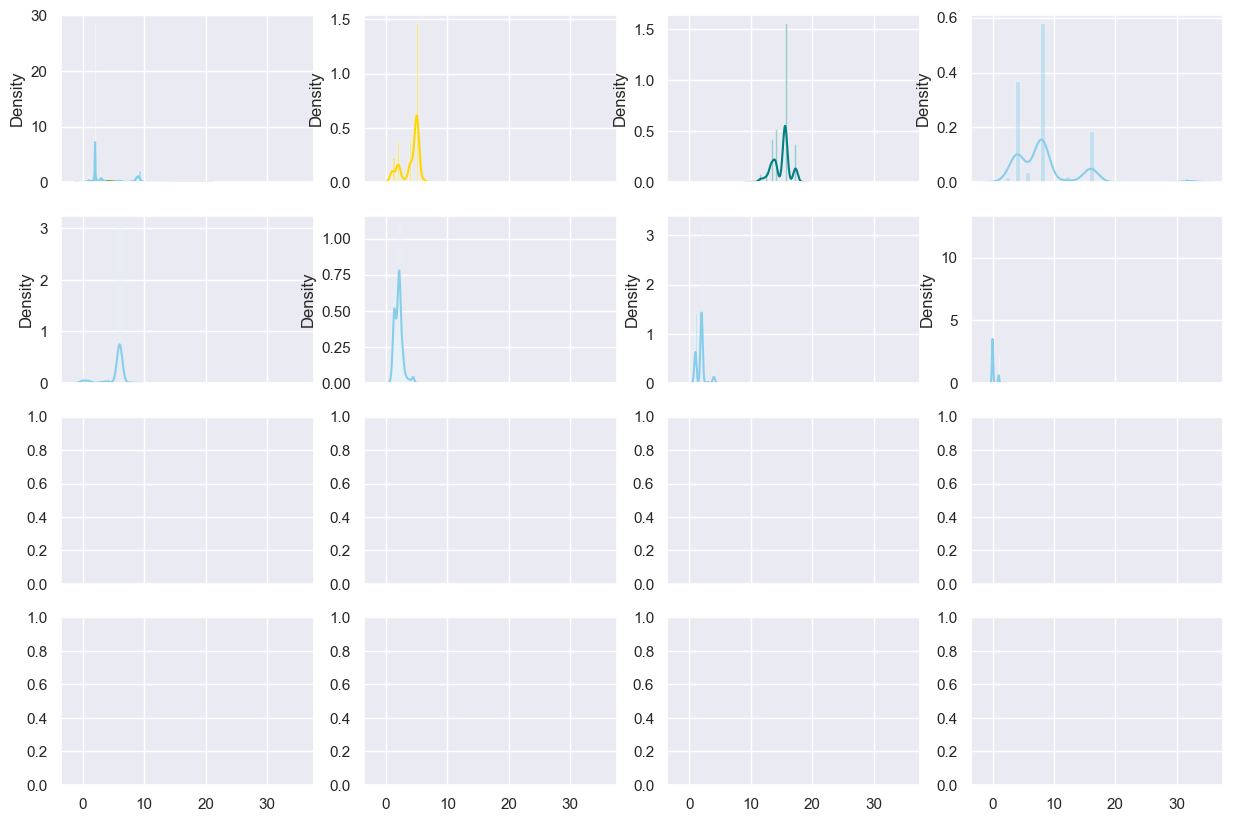

In [27]:
f, axes = plt.subplots(4, 4, figsize=(15,10), sharex=True)
sns.distplot(train2['Company'], color="olive", ax=axes[0, 0])
sns.distplot(train2['TypeName'], color="gold", ax=axes[0, 1])
sns.distplot(train2['Inches'] , color="teal", ax=axes[0, 2])
sns.distplot(train2['Ram'] , color="skyblue", ax=axes[0, 3])
sns.distplot(train2['OpSys'] , color="skyblue", ax=axes[1, 0])
sns.distplot(train2['Weight'] , color="skyblue", ax=axes[1, 1])
sns.distplot(train2['Memory1_2'] , color="skyblue", ax=axes[1, 2])
sns.distplot(train2['Memory2_2'] , color="skyblue", ax=axes[1, 3])
sns.distplot(train2['Gpu1'] , color="skyblue", ax=axes[0, 0])
sns.distplot(train2['Gpu2'] , color="skyblue", ax=axes[0, 0])
sns.distplot(train2['Cpu1'] , color="skyblue", ax=axes[0, 0])
sns.distplot(train2['Cpu2'] , color="skyblue", ax=axes[0, 0])
sns.distplot(train2['Cpu3'] , color="skyblue", ax=axes[0, 0]);

# Bivariate analysis

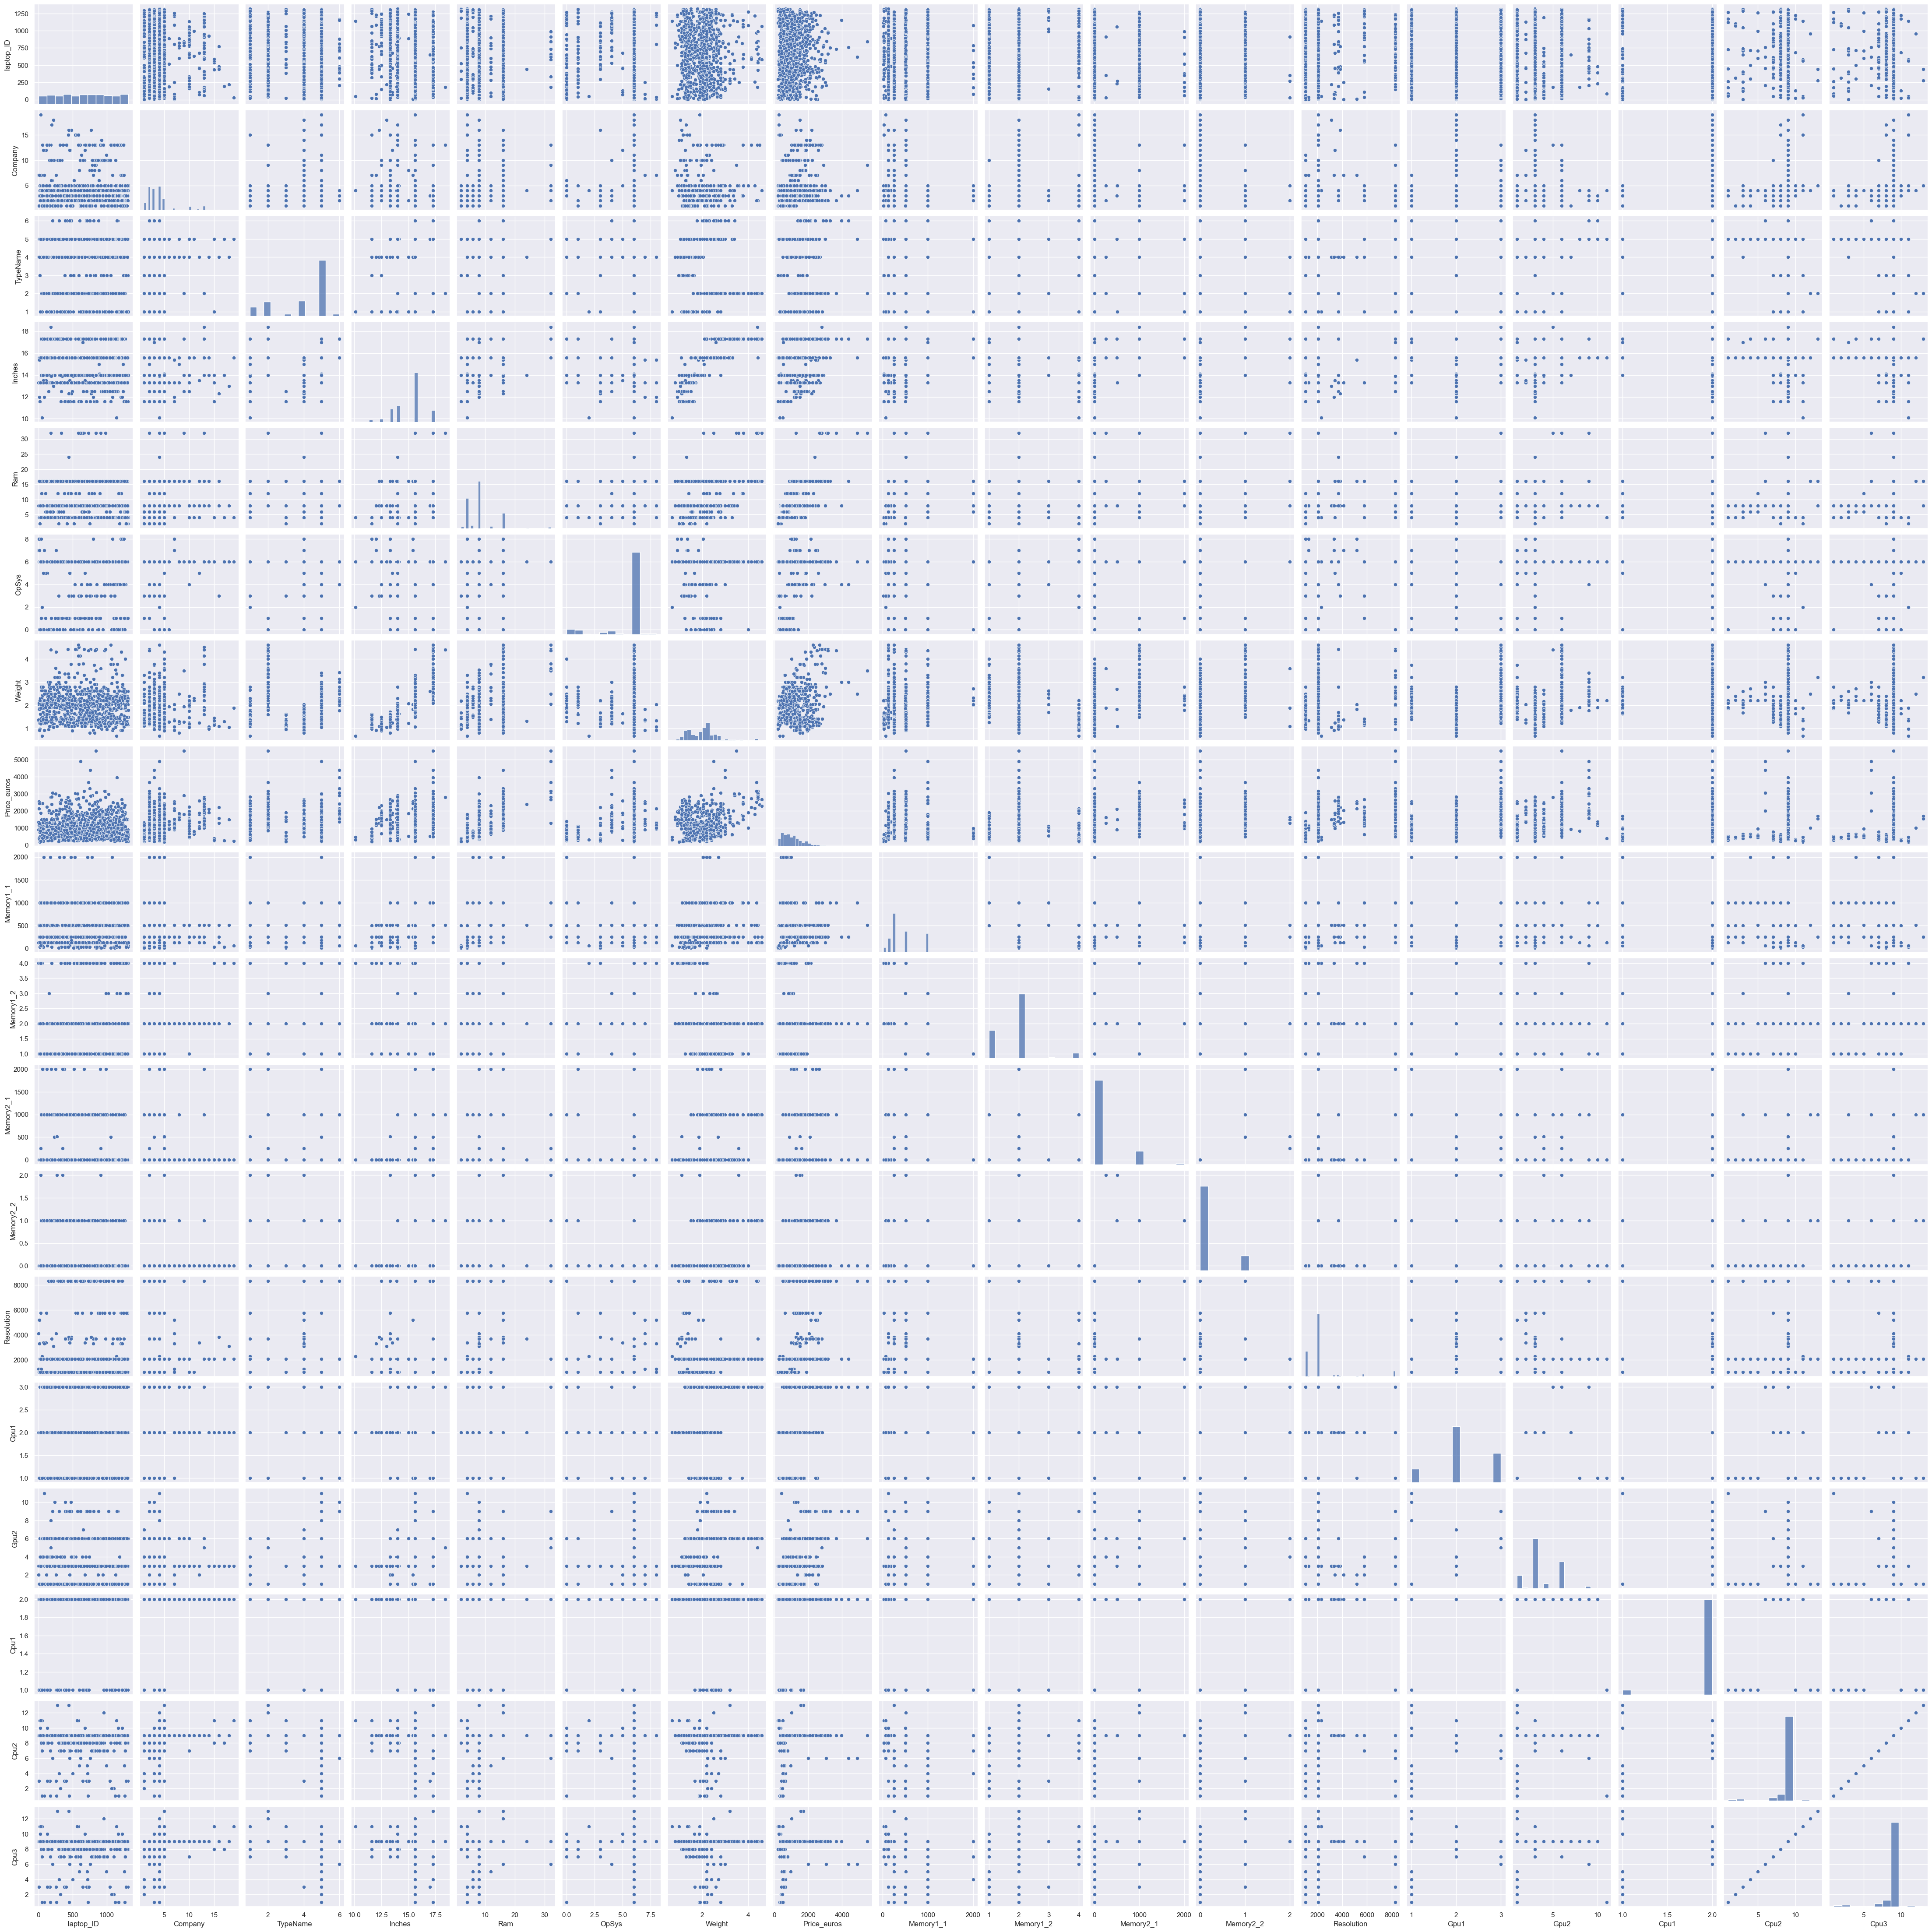

In [84]:
sns.set(rc={'figure.figsize':(20, 20)})
sns.pairplot(train2);

In [28]:
#Displaying correlation among all the columns 
train2.corr()

,laptop_ID,Company,TypeName,Inches,Ram,OpSys,Weight,Price_euros,Memory1_1,Memory1_2,Memory2_1,Memory2_2,Resolution,Gpu1,Gpu2,Cpu1,Cpu2,Cpu3
laptop_ID,1.000000,0.007946,-0.081869,-0.076871,-0.039207,-0.006946,-0.007465,0.056520,-0.000884,-0.003334,-0.037022,-0.029263,-0.029696,0.007158,-0.056685,0.007571,-0.020175,-0.020175
Company,0.007946,1.000000,-0.179411,-0.003922,0.171637,0.093271,-0.037768,0.209893,-0.175729,0.167098,0.209016,0.203272,0.013679,0.198506,0.126747,0.062960,0.105425,0.105425
TypeName,-0.081869,-0.179411,1.000000,0.097171,-0.375010,-0.145622,-0.108980,-0.354424,0.145542,-0.174648,-0.332585,-0.352311,-0.163262,-0.292673,-0.195968,-0.110620,-0.175471,-0.175471
Inches,-0.076871,-0.003922,0.097171,1.000000,0.240013,-0.074463,0.836905,0.054903,0.265360,-0.392661,0.378987,0.388938,0.049439,0.248875,0.313478,-0.119192,-0.071108,-0.071108
Ram,-0.039207,0.171637,-0.375010,0.240013,1.000000,0.154555,0.375818,0.743057,-0.005094,0.088950,0.421910,0.438320,0.364159,0.351861,0.362524,0.102173,0.162703,0.162703
OpSys,-0.006946,0.093271,-0.145622,-0.074463,0.154555,1.000000,-0.040610,0.230844,-0.176024,0.163790,0.100758,0.111255,0.108076,0.026194,0.043109,-0.041541,-0.005571,-0.005571
Weight,-0.007465,-0.037768,-0.108980,0.836905,0.375818,-0.040610,1.000000,0.183293,0.176336,-0.275884,0.459839,0.482678,0.061129,0.352275,0.392700,-0.055864,-0.018248,-0.018248
Price_euros,0.056520,0.209893,-0.354424,0.054903,0.743057,0.230844,0.183293,1.000000,-0.148633,0.149439,0.299199,0.309509,0.413469,0.360038,0.401910,0.186696,0.221793,0.221793
Memory1_1,-0.000884,-0.175729,0.145542,0.265360,-0.005094,-0.176024,0.176336,-0.148633,1.000000,-0.621657,-0.238321,-0.244889,0.053440,-0.065292,-0.044170,-0.098708,-0.110012,-0.110012
Memory1_2,-0.003334,0.167098,-0.174648,-0.392661,0.088950,0.163790,-0.275884,0.149439,-0.621657,1.000000,0.096107,0.099615,0.049001,0.030494,-0.001305,0.077997,0.046332,0.046332


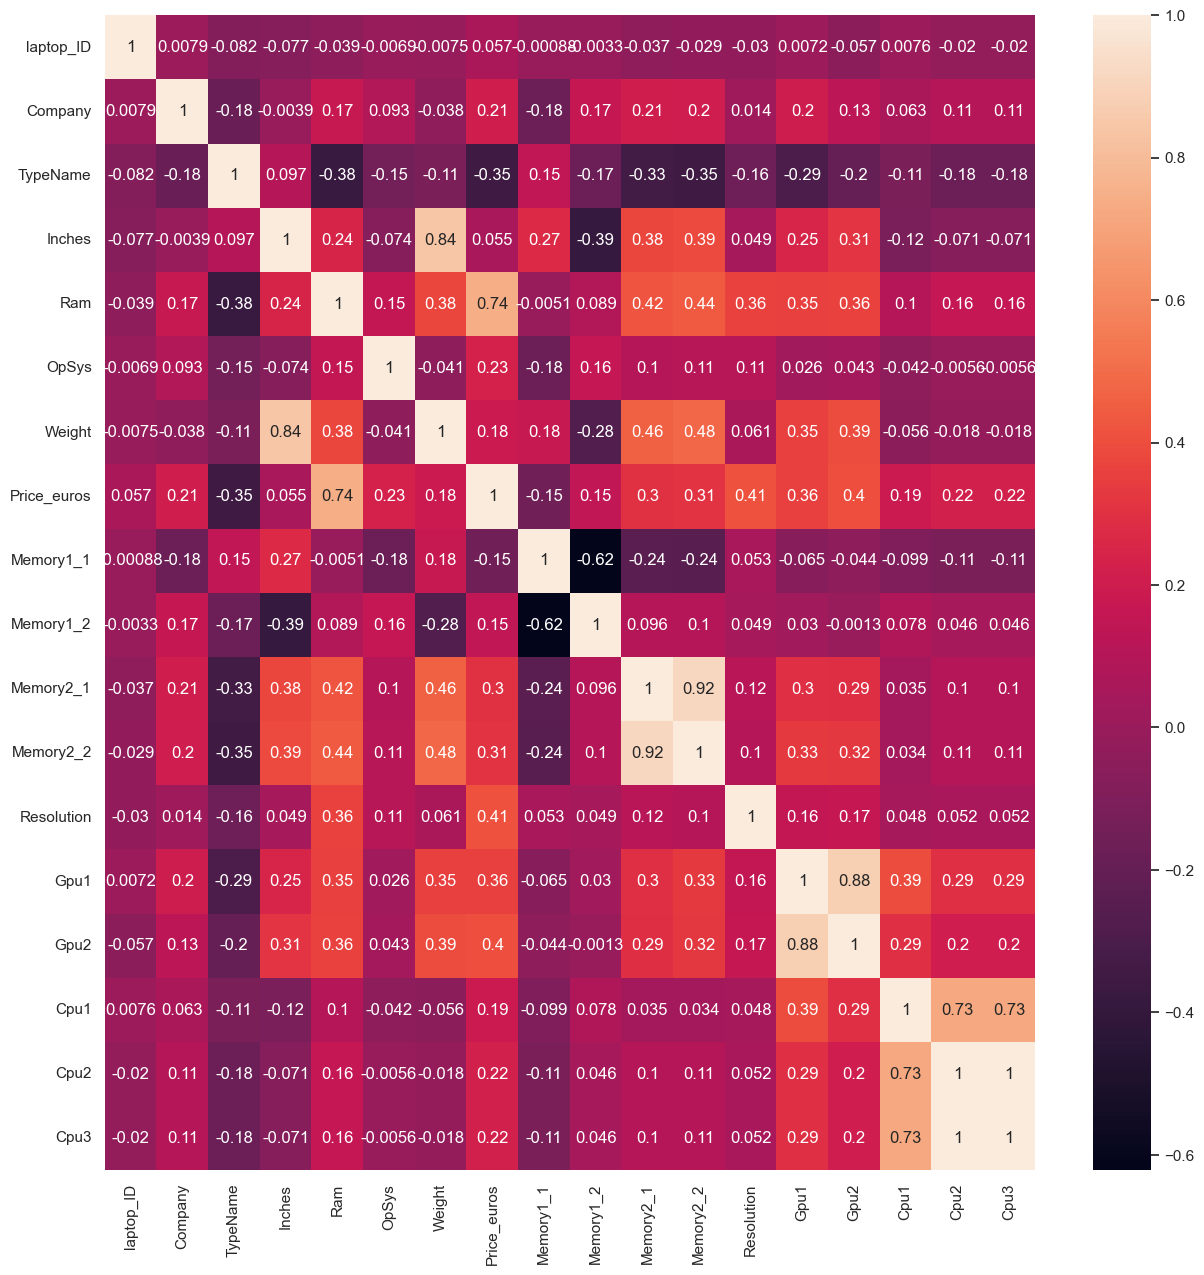

In [29]:
sns.set(rc={'figure.figsize':(15, 15)})
sns.heatmap(train2.corr(), annot=True);

# TEST DATAFRAME

In [30]:
df_test = pd.read_csv('data/test.csv')
df_test.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,750,Toshiba,Tecra X40-D-10G,Notebook,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.25kg
1,726,Mediacom,Smartbook 142,Notebook,14.0,IPS Panel Full HD 1920x1200,Intel Atom Z8350 1.92GHz,4GB,32GB HDD,Intel HD Graphics 400,Windows 10,1.4kg
2,633,Mediacom,SmartBook 140,Notebook,14.0,Full HD 1920x1080,Intel Atom x5-Z8350 1.44GHz,2GB,32GB Flash Storage,Intel HD Graphics,Windows 10,1.4kg
3,363,Dell,Inspiron 7577,Gaming,15.6,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8GB,1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.65kg
4,319,Asus,VivoBook Flip,2 in 1 Convertible,11.6,Touchscreen 1366x768,Intel Celeron Dual Core N3350 1.1GHz,2GB,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.1kg


In [57]:
df_test['Weight'] = df_test['Weight'].replace('kg', '', regex=True)

#Memory cleaning
df_test[['Memory1', 'Memory2']] = df_test['Memory'].str.split(' + ', n=1, expand=True)
df_test[['Memory1_1', 'Memory1_2']] = df_test['Memory1'].str.split(' ', n=1, expand=True)
df_test[['Memory2_1', 'Memory2_2']] = df_test['Memory2'].str.split(' ', n=1, expand=True)

df_test.loc[:, ['Memory1_2', 'Memory2_2']] = df_test.loc[:, ['Memory1_2', 'Memory2_2']].fillna(0)
df_test.loc[:, ['Memory1_2', 'Memory2_2']] = df_test.loc[:, ['Memory1_2', 'Memory2_2']].replace('HDD', 1)
df_test.loc[:, ['Memory1_2', 'Memory2_2']] = df_test.loc[:, ['Memory1_2', 'Memory2_2']].replace('HDD +', 1)
df_test.loc[:, ['Memory1_2', 'Memory2_2']] = df_test.loc[:, ['Memory1_2', 'Memory2_2']].replace('SSD', 2)
df_test.loc[:, ['Memory1_2', 'Memory2_2']] = df_test.loc[:, ['Memory1_2', 'Memory2_2']].replace('SSD +', 2)
df_test.loc[:, ['Memory1_2', 'Memory2_2']] = df_test.loc[:, ['Memory1_2', 'Memory2_2']].replace('Hybrid', 3)
df_test.loc[:, ['Memory1_2', 'Memory2_2']] = df_test.loc[:, ['Memory1_2', 'Memory2_2']].replace('Hybrid +', 3)
df_test.loc[:, ['Memory1_2', 'Memory2_2']] = df_test.loc[:, ['Memory1_2', 'Memory2_2']].replace('Flash Storage', 4)
df_test.loc[:, ['Memory1_2', 'Memory2_2']] = df_test.loc[:, ['Memory1_2', 'Memory2_2']].replace('Flash Storage +', 4)

df_test.loc[:, ['Memory1_1', 'Memory2_1']] = df_test.loc[:, ['Memory1_1', 'Memory2_1']].fillna(0)
df_test['Memory1_1'] = df_test['Memory1_1'].replace('GB', '', regex=True)
df_test['Memory1_1'] = df_test['Memory1_1'].replace('1.0TB', '1000', regex=True)
df_test['Memory1_1'] = df_test['Memory1_1'].replace('TB', '000', regex=True)

df_test['Memory2_1'] = df_test['Memory2_1'].replace('GB', '', regex=True)
df_test['Memory2_1'] = df_test['Memory2_1'].replace('1.0TB', '1000', regex=True)
df_test['Memory2_1'] = df_test['Memory2_1'].replace('TB', '000', regex=True)


df_test1 = df_test.drop(['Memory', 'Memory1', 'Memory2'], axis=1)


In [75]:
df_test1['Ram'] = df_test1['Ram'].replace('GB', '', regex=True)

#ScreenResolution
df_test1['ScreenResolution'] = df_test1['ScreenResolution'].replace('1366x768', '1049', regex=True)
df_test1['ScreenResolution'] = df_test1['ScreenResolution'].replace('1440x900', '1296', regex=True)
df_test1['ScreenResolution'] = df_test1['ScreenResolution'].replace('1600x900', '8294', regex=True)
df_test1['ScreenResolution'] = df_test1['ScreenResolution'].replace('1920x1080', '2073', regex=True)
df_test1['ScreenResolution'] = df_test1['ScreenResolution'].replace('1920x1200', '2304', regex=True)
df_test1['ScreenResolution'] = df_test1['ScreenResolution'].replace('2160x1440', '3110', regex=True)
df_test1['ScreenResolution'] = df_test1['ScreenResolution'].replace('2304x1440', '3318', regex=True)
df_test1['ScreenResolution'] = df_test1['ScreenResolution'].replace('2256x1504', '3393', regex=True)
df_test1['ScreenResolution'] = df_test1['ScreenResolution'].replace('2560x1440', '3686', regex=True)
df_test1['ScreenResolution'] = df_test1['ScreenResolution'].replace('2560x1600', '4096', regex=True)
df_test1['ScreenResolution'] = df_test1['ScreenResolution'].replace('2880x1800', '5184', regex=True)
df_test1['ScreenResolution'] = df_test1['ScreenResolution'].replace('2400x1600', '3840', regex=True)
df_test1['ScreenResolution'] = df_test1['ScreenResolution'].replace('3200x1800', '5760', regex=True)
df_test1['ScreenResolution'] = df_test1['ScreenResolution'].replace('3840x2160', '8294', regex=True)

df_test1['Resolution'] = df_test1['ScreenResolution'].str[-4:]

#Numeric categorization of TypeName
df_test1['TypeName'] = df_test1['TypeName'].replace(to_replace='Workstation', value=6, regex=True)
df_test1['TypeName'] = df_test1['TypeName'].replace(to_replace='Notebook', value=5, regex=True)
df_test1['TypeName'] = df_test1['TypeName'].replace(to_replace='Ultrabook', value=4, regex=True)
df_test1['TypeName'] = df_test1['TypeName'].replace(to_replace='Netbook', value=3, regex=True)
df_test1['TypeName'] = df_test1['TypeName'].replace(to_replace='Gaming', value=2, regex=True)
df_test1['TypeName'] = df_test1['TypeName'].replace(to_replace='2 in 1 Convertible', value=1, regex=True)

#Numeric categorization of OpSys
df_test1['OpSys'] = df_test1['OpSys'].replace(to_replace='No OS', value=0, regex=True)
df_test1['OpSys'] = df_test1['OpSys'].replace(to_replace='Linux', value=1, regex=True)
df_test1['OpSys'] = df_test1['OpSys'].replace(to_replace='Android', value=2, regex=True)
df_test1['OpSys'] = df_test1['OpSys'].replace(to_replace='Chrome OS', value=3, regex=True)
df_test1['OpSys'] = df_test1['OpSys'].replace(to_replace='Windows 7', value=4, regex=True)
df_test1['OpSys'] = df_test1['OpSys'].replace(to_replace='Windows 10 S', value=5, regex=True)
df_test1['OpSys'] = df_test1['OpSys'].replace(to_replace='Windows 10', value=6, regex=True)
df_test1['OpSys'] = df_test1['OpSys'].replace(to_replace='macOS', value=7, regex=True)
df_test1['OpSys'] = df_test1['OpSys'].replace(to_replace='Mac OS X', value=8, regex=True)


#Numeric categorization of Company
df_test1['Company'] = df_test1['Company'].replace(to_replace='Acer', value=1, regex=True)
df_test1['Company'] = df_test1['Company'].replace(to_replace='Dell', value=2, regex=True)
df_test1['Company'] = df_test1['Company'].replace(to_replace='HP', value=3, regex=True)
df_test1['Company'] = df_test1['Company'].replace(to_replace='Lenovo', value=4, regex=True)
df_test1['Company'] = df_test1['Company'].replace(to_replace='Asus', value=5, regex=True)
df_test1['Company'] = df_test1['Company'].replace(to_replace='Xiaomi', value=6, regex=True)
df_test1['Company'] = df_test1['Company'].replace(to_replace='Apple', value=7, regex=True)
df_test1['Company'] = df_test1['Company'].replace(to_replace='Samsung', value=8, regex=True)
df_test1['Company'] = df_test1['Company'].replace(to_replace='Razer', value=9, regex=True)
df_test1['Company'] = df_test1['Company'].replace(to_replace='Toshiba', value=10, regex=True)
df_test1['Company'] = df_test1['Company'].replace(to_replace='Fujitsu', value=11, regex=True)
df_test1['Company'] = df_test1['Company'].replace(to_replace='Microsoft', value=12, regex=True)
df_test1['Company'] = df_test1['Company'].replace(to_replace='MSI', value=13, regex=True)
df_test1['Company'] = df_test1['Company'].replace(to_replace='LG', value=14, regex=True)
df_test1['Company'] = df_test1['Company'].replace(to_replace='Mediacom', value=15, regex=True)
df_test1['Company'] = df_test1['Company'].replace(to_replace='Google', value=16, regex=True)
df_test1['Company'] = df_test1['Company'].replace(to_replace='Vero', value=17, regex=True)
df_test1['Company'] = df_test1['Company'].replace(to_replace='Huawei', value=18, regex=True)
df_test1['Company'] = df_test1['Company'].replace(to_replace='Chuwi', value=19, regex=True)

#Numeric categorization of Gpu
df_test1['Gpu'] = df_test1['Gpu'].str.split().str[:2].str.join(' ')
df_test1[['Gpu1', 'Gpu2']] = df_test1['Gpu'].str.split(' ', n=1, expand=True)
df_test1['Gpu1'] = df_test1['Gpu1'].replace('AMD', '1')
df_test1['Gpu1'] = df_test1['Gpu1'].replace('Intel', '2')
df_test1['Gpu1'] = df_test1['Gpu1'].replace('Nvidia', '3')
df_test1['Gpu1'] = df_test1['Gpu1'].replace('ARM', '3')

df_test1['Gpu2'] = df_test1['Gpu2'].replace('Radeon', '1')
df_test1['Gpu2'] = df_test1['Gpu2'].replace('Iris', '2')
df_test1['Gpu2'] = df_test1['Gpu2'].replace('HD', '3')
df_test1['Gpu2'] = df_test1['Gpu2'].replace('UHD', '4')
df_test1['Gpu2'] = df_test1['Gpu2'].replace('GTX', '5')
df_test1['Gpu2'] = df_test1['Gpu2'].replace('GeForce', '6')
df_test1['Gpu2'] = df_test1['Gpu2'].replace('Graphics', '7')
df_test1['Gpu2'] = df_test1['Gpu2'].replace('R17M-M1-70', '8')
df_test1['Gpu2'] = df_test1['Gpu2'].replace('Quadro', '9')
df_test1['Gpu2'] = df_test1['Gpu2'].replace('FirePro', '10')
df_test1['Gpu2'] = df_test1['Gpu2'].replace('R4', '11')
df_test1['Gpu2'] = df_test1['Gpu2'].replace('Mali', '12')

#Numeric categorization of Cpu
df_test1['Cpu'] = df_test1['Cpu'].str.split().str[:3].str.join(' ')
df_test1[['Cpu1', 'Cpu2', 'Cpu3']] = df_test1['Cpu'].str.split(' ', n=2, expand=True)
df_test1['Cpu1'] = df_test1['Cpu1'].replace('AMD', '1')
df_test1['Cpu1'] = df_test1['Cpu1'].replace('Intel', '2')
df_test1['Cpu1'] = df_test1['Cpu1'].replace('Samsung', '3')

df_test1['Cpu2'] = df_test1['Cpu2'].replace('A6-Series', '1')
df_test1['Cpu2'] = df_test1['Cpu2'].replace('A8-Series', '2')
df_test1['Cpu2'] = df_test1['Cpu2'].replace('A9-Series', '3')
df_test1['Cpu2'] = df_test1['Cpu2'].replace('A10-Series', '4')
df_test1['Cpu2'] = df_test1['Cpu2'].replace('A12-Series', '5')
df_test1['Cpu2'] = df_test1['Cpu2'].replace('Xeon', '6')
df_test1['Cpu2'] = df_test1['Cpu2'].replace('Pentium', '7')
df_test1['Cpu2'] = df_test1['Cpu2'].replace('Celeron', '8')
df_test1['Cpu2'] = df_test1['Cpu2'].replace('Core', '9')
df_test1['Cpu2'] = df_test1['Cpu2'].replace('E-Series', '10')
df_test1['Cpu2'] = df_test1['Cpu2'].replace('Atom', '11')
df_test1['Cpu2'] = df_test1['Cpu2'].replace('FX', '12')
df_test1['Cpu2'] = df_test1['Cpu2'].replace('Ryzen', '13')
df_test1['Cpu2'] = df_test1['Cpu2'].replace('A4-Series', '14')
df_test1['Cpu2'] = df_test1['Cpu2'].replace('Cortex', '15')

df_test1['Cpu3'] = df_test1['Cpu3'].replace('M', '1')
df_test1['Cpu3'] = df_test1['Cpu3'].replace('Dual', '2')
df_test1['Cpu3'] = df_test1['Cpu3'].replace('Quad', '3')
df_test1['Cpu3'] = df_test1['Cpu3'].replace('i3', '4')
df_test1['Cpu3'] = df_test1['Cpu3'].replace('i5', '5')
df_test1['Cpu3'] = df_test1['Cpu3'].replace('i7', '6')
df_test1['Cpu3'] = df_test1['Cpu3'].replace('A6-9220', '7')
df_test1['Cpu3'] = df_test1['Cpu3'].replace('E2-9000e', '8')
df_test1['Cpu3'] = df_test1['Cpu3'].replace('E2-9000', '9')
df_test1['Cpu3'] = df_test1['Cpu3'].replace('E3-1505M', '10')
df_test1['Cpu3'] = df_test1['Cpu3'].replace('E3-1535M', '11')
df_test1['Cpu3'] = df_test1['Cpu3'].replace('x5-Z8300', '12')
df_test1['Cpu3'] = df_test1['Cpu3'].replace('x5-Z8350', '13')
df_test1['Cpu3'] = df_test1['Cpu3'].replace('x5-Z8550', '14')
df_test1['Cpu3'] = df_test1['Cpu3'].replace('A9-9420', '15')
df_test1['Cpu3'] = df_test1['Cpu3'].replace('1600', '16')
df_test1['Cpu3'] = df_test1['Cpu3'].replace('1700', '17')
df_test1['Cpu3'] = df_test1['Cpu3'].replace('6110', '18')
df_test1['Cpu3'] = df_test1['Cpu3'].replace('7110', '19')
df_test1['Cpu3'] = df_test1['Cpu3'].replace('7310', '20')
df_test1['Cpu3'] = df_test1['Cpu3'].replace('7410', '21')
df_test1['Cpu3'] = df_test1['Cpu3'].replace('9000', '22')
df_test1['Cpu3'] = df_test1['Cpu3'].replace('9220', '23')
df_test1['Cpu3'] = df_test1['Cpu3'].replace('9410', '24')
df_test1['Cpu3'] = df_test1['Cpu3'].replace('9420', '25')
df_test1['Cpu3'] = df_test1['Cpu3'].replace('8800P', '26')
df_test1['Cpu3'] = df_test1['Cpu3'].replace('9600P', '27')
df_test1['Cpu3'] = df_test1['Cpu3'].replace('9620P', '28')
df_test1['Cpu3'] = df_test1['Cpu3'].replace('9720P', '29')

#Drop columns
df_test2 = df_test1.drop(['ScreenResolution', 'Product', 'Cpu', 'Gpu'], axis=1)

# Change data type of new columns to numeric
df_test2['Ram'] = df_test2['Ram'].astype(int)
df_test2['Weight'] = df_test2['Weight'].astype(float)
df_test2['Memory1_1'] = df_test2['Memory1_1'].astype(int)
df_test2['Memory1_2'] = df_test2['Memory1_2'].astype(int)
df_test2['Memory2_1'] = df_test2['Memory2_1'].astype(int)
df_test2['Memory2_2'] = df_test2['Memory2_2'].astype(int)
df_test2['Resolution'] = df_test2['Resolution'].astype(int)
df_test2['Gpu1'] = df_test2['Gpu1'].astype(int)
df_test2['Gpu2'] = df_test2['Gpu2'].astype(int)
df_test2['Cpu1'] = df_test2['Cpu1'].astype(int)
df_test2['Cpu2'] = df_test2['Cpu2'].astype(int)
df_test2['Cpu3'] = df_test2['Cpu2'].astype(int)

In [76]:
df_test2.head()

,laptop_ID,Company,TypeName,Inches,Ram,OpSys,Weight,Memory1_1,Memory1_2,Memory2_1,Memory2_2,Resolution,Gpu1,Gpu2,Cpu1,Cpu2,Cpu3
0,750,10,5,14.0,8,6,1.25,256,2,0,0,2073,2,3,2,9,9
1,726,15,5,14.0,4,6,1.40,32,1,0,0,2304,2,3,2,11,11
2,633,15,5,14.0,2,6,1.40,32,4,0,0,2073,2,3,2,11,11
3,363,2,2,15.6,8,6,2.65,1000,1,0,0,2073,3,6,2,9,9
4,319,5,1,11.6,2,6,1.10,32,4,0,0,1049,2,3,2,8,8


In [79]:
df_test2.shape

(391, 17)

In [82]:
df_train2.shape

(912, 18)

In [78]:

df_test2.to_csv('data/test2.csv', index=False)